In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns
%matplotlib inline

In [1]:
mydata=pd.read_csv("C:/Users/DIVYA/Downloads/proj_flaskdm (1)/proj_flask/adult-training.csv")

NameError: name 'pd' is not defined

In [3]:
mydata.head()

,age,work_class,fnlwgt,education,marital_status,occupation,race,gender,relationship,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,Never-married,Adm-clerical,White,Male,Not-in-family,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,Married-civ-spouse,Exec-managerial,White,Male,Husband,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,Divorced,Handlers-cleaners,White,Male,Not-in-family,0,0,40,United-States,<=50K
3,53,Private,234721,11th,Married-civ-spouse,Handlers-cleaners,Black,Male,Husband,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,Married-civ-spouse,Prof-specialty,Black,Female,Wife,0,0,40,Cuba,<=50K


# Data cleaning 

In [4]:
mydata['income'] = mydata['income'].apply(lambda x: 1 if x==' >50K' else 0)

In [5]:
mydata['gender'] = mydata['gender'].apply(lambda x: 1 if x==' male' else 0)

In [6]:
#combinig workclass
def workclass(x):
    if re.search('Private', x):
        return 'Private'
    elif re.search('Self', x):
        return 'selfempl'
    elif re.search('gov', x):
        return 'gov'
    else:
        return 'others'
mydata['work_class']=mydata.work_class.apply(lambda x: x.strip()).apply(lambda x: workclass(x))

In [7]:
mydata['work_class'].value_counts()

Private     22286
gov          4289
selfempl     3573
others         14
Name: work_class, dtype: int64

In [8]:
dummywk=pd.get_dummies(mydata['work_class'])
#dummywk

In [9]:
mydata=pd.concat([mydata,dummywk],axis=1)
mydata

,age,work_class,fnlwgt,education,marital_status,occupation,race,gender,relationship,capital_gain,capital_loss,hours_per_week,native_country,income,Private,gov,others,selfempl
0,39,gov,77516,Bachelors,Never-married,Adm-clerical,White,0,Not-in-family,2174,0,40,United-States,0,0,1,0,0
1,50,selfempl,83311,Bachelors,Married-civ-spouse,Exec-managerial,White,0,Husband,0,0,13,United-States,0,0,0,0,1
2,38,Private,215646,HS-grad,Divorced,Handlers-cleaners,White,0,Not-in-family,0,0,40,United-States,0,1,0,0,0
3,53,Private,234721,11th,Married-civ-spouse,Handlers-cleaners,Black,0,Husband,0,0,40,United-States,0,1,0,0,0
4,28,Private,338409,Bachelors,Married-civ-spouse,Prof-specialty,Black,0,Wife,0,0,40,Cuba,0,1,0,0,0
5,37,Private,284582,Masters,Married-civ-spouse,Exec-managerial,White,0,Wife,0,0,40,United-States,0,1,0,0,0
6,49,Private,160187,9th,Married-spouse-absent,Other-service,Black,0,Not-in-family,0,0,16,Jamaica,0,1,0,0,0
7,52,selfempl,209642,HS-grad,Married-civ-spouse,Exec-managerial,White,0,Husband,0,0,45,United-States,1,0,0,0,1
8,31,Private,45781,Masters,Never-married,Prof-specialty,White,0,Not-in-family,14084,0,50,United-States,1,1,0,0,0
9,42,Private,159449,Bachelors,Married-civ-spouse,Exec-managerial,White,0,Husband,5178,0,40,United-States,1,1,0,0,0


In [10]:
#combinig marital_Status
def maritalstatus(x):
    if re.search('Married', x):
        return 'Married'
    elif re.search('Never-married', x):
        return 'Never-married'
    else:
        return 'Single'
mydata['marital_status']=mydata.marital_status.apply(lambda x: x.strip()).apply(lambda x: maritalstatus(x))

In [11]:
mydata['marital_status'].value_counts()
#mydata.marital_status.unique()

Married          14456
Never-married     9726
Single            5980
Name: marital_status, dtype: int64

In [12]:
dummyms = pd.get_dummies(mydata['marital_status'])
dummyms

,Married,Never-married,Single
0,0,1,0
1,1,0,0
2,0,0,1
3,1,0,0
4,1,0,0
5,1,0,0
6,1,0,0
7,1,0,0
8,0,1,0
9,1,0,0


In [13]:
mydata=pd.concat([mydata,dummyms],axis=1)
mydata

,age,work_class,fnlwgt,education,marital_status,occupation,race,gender,relationship,capital_gain,...,hours_per_week,native_country,income,Private,gov,others,selfempl,Married,Never-married,Single
0,39,gov,77516,Bachelors,Never-married,Adm-clerical,White,0,Not-in-family,2174,...,40,United-States,0,0,1,0,0,0,1,0
1,50,selfempl,83311,Bachelors,Married,Exec-managerial,White,0,Husband,0,...,13,United-States,0,0,0,0,1,1,0,0
2,38,Private,215646,HS-grad,Single,Handlers-cleaners,White,0,Not-in-family,0,...,40,United-States,0,1,0,0,0,0,0,1
3,53,Private,234721,11th,Married,Handlers-cleaners,Black,0,Husband,0,...,40,United-States,0,1,0,0,0,1,0,0
4,28,Private,338409,Bachelors,Married,Prof-specialty,Black,0,Wife,0,...,40,Cuba,0,1,0,0,0,1,0,0
5,37,Private,284582,Masters,Married,Exec-managerial,White,0,Wife,0,...,40,United-States,0,1,0,0,0,1,0,0
6,49,Private,160187,9th,Married,Other-service,Black,0,Not-in-family,0,...,16,Jamaica,0,1,0,0,0,1,0,0
7,52,selfempl,209642,HS-grad,Married,Exec-managerial,White,0,Husband,0,...,45,United-States,1,0,0,0,1,1,0,0
8,31,Private,45781,Masters,Never-married,Prof-specialty,White,0,Not-in-family,14084,...,50,United-States,1,1,0,0,0,0,1,0
9,42,Private,159449,Bachelors,Married,Exec-managerial,White,0,Husband,5178,...,40,United-States,1,1,0,0,0,1,0,0


In [14]:
#combining native_country
def country(x):
    if re.search('United-States', x):
        return 'US'
    else:
        return 'not-US'
mydata['native_country']=mydata.native_country.apply(lambda x: x.strip()).apply(lambda x: country(x))

In [15]:
mydata['native_country'].value_counts()

US        27504
not-US     2658
Name: native_country, dtype: int64

In [16]:
dummync = pd.get_dummies(mydata['native_country'])
dummync

,US,not-US
0,1,0
1,1,0
2,1,0
3,1,0
4,0,1
5,1,0
6,0,1
7,1,0
8,1,0
9,1,0


In [17]:
mydata=pd.concat([mydata,dummync],axis=1)
mydata

,age,work_class,fnlwgt,education,marital_status,occupation,race,gender,relationship,capital_gain,...,income,Private,gov,others,selfempl,Married,Never-married,Single,US,not-US
0,39,gov,77516,Bachelors,Never-married,Adm-clerical,White,0,Not-in-family,2174,...,0,0,1,0,0,0,1,0,1,0
1,50,selfempl,83311,Bachelors,Married,Exec-managerial,White,0,Husband,0,...,0,0,0,0,1,1,0,0,1,0
2,38,Private,215646,HS-grad,Single,Handlers-cleaners,White,0,Not-in-family,0,...,0,1,0,0,0,0,0,1,1,0
3,53,Private,234721,11th,Married,Handlers-cleaners,Black,0,Husband,0,...,0,1,0,0,0,1,0,0,1,0
4,28,Private,338409,Bachelors,Married,Prof-specialty,Black,0,Wife,0,...,0,1,0,0,0,1,0,0,0,1
5,37,Private,284582,Masters,Married,Exec-managerial,White,0,Wife,0,...,0,1,0,0,0,1,0,0,1,0
6,49,Private,160187,9th,Married,Other-service,Black,0,Not-in-family,0,...,0,1,0,0,0,1,0,0,0,1
7,52,selfempl,209642,HS-grad,Married,Exec-managerial,White,0,Husband,0,...,1,0,0,0,1,1,0,0,1,0
8,31,Private,45781,Masters,Never-married,Prof-specialty,White,0,Not-in-family,14084,...,1,1,0,0,0,0,1,0,1,0
9,42,Private,159449,Bachelors,Married,Exec-managerial,White,0,Husband,5178,...,1,1,0,0,0,1,0,0,1,0


In [18]:
#combining education
def education(x):
    if re.search('Bachelors', x):
        return 'Bachelors'
    elif re.search('Some-College', x):
        return 'others'
    elif re.search('Masters', x):
        return 'Higher-education'
    elif re.search('Doctorate', x):
        return 'Higher-education'
    elif re.search('Prof-school',x):
        return 'Professional'
    elif re.search('Assoc-voc',x):
        return 'Professional'
    elif re.search('Assoc-acdm',x):
        return 'Professional'
    else:
        return 'Primary'
mydata['education']=mydata.education.apply(lambda x: x.strip()).apply(lambda x: education(x))

In [19]:
mydata['education'].value_counts()

Primary             20259
Bachelors            5044
Professional         2857
Higher-education     2002
Name: education, dtype: int64

In [20]:
dummye = pd.get_dummies(mydata['education'])
dummye

,Bachelors,Higher-education,Primary,Professional
0,1,0,0,0
1,1,0,0,0
2,0,0,1,0
3,0,0,1,0
4,1,0,0,0
5,0,1,0,0
6,0,0,1,0
7,0,0,1,0
8,0,1,0,0
9,1,0,0,0


In [21]:
mydata=pd.concat([mydata,dummye],axis=1)
mydata

,age,work_class,fnlwgt,education,marital_status,occupation,race,gender,relationship,capital_gain,...,selfempl,Married,Never-married,Single,US,not-US,Bachelors,Higher-education,Primary,Professional
0,39,gov,77516,Bachelors,Never-married,Adm-clerical,White,0,Not-in-family,2174,...,0,0,1,0,1,0,1,0,0,0
1,50,selfempl,83311,Bachelors,Married,Exec-managerial,White,0,Husband,0,...,1,1,0,0,1,0,1,0,0,0
2,38,Private,215646,Primary,Single,Handlers-cleaners,White,0,Not-in-family,0,...,0,0,0,1,1,0,0,0,1,0
3,53,Private,234721,Primary,Married,Handlers-cleaners,Black,0,Husband,0,...,0,1,0,0,1,0,0,0,1,0
4,28,Private,338409,Bachelors,Married,Prof-specialty,Black,0,Wife,0,...,0,1,0,0,0,1,1,0,0,0
5,37,Private,284582,Higher-education,Married,Exec-managerial,White,0,Wife,0,...,0,1,0,0,1,0,0,1,0,0
6,49,Private,160187,Primary,Married,Other-service,Black,0,Not-in-family,0,...,0,1,0,0,0,1,0,0,1,0
7,52,selfempl,209642,Primary,Married,Exec-managerial,White,0,Husband,0,...,1,1,0,0,1,0,0,0,1,0
8,31,Private,45781,Higher-education,Never-married,Prof-specialty,White,0,Not-in-family,14084,...,0,0,1,0,1,0,0,1,0,0
9,42,Private,159449,Bachelors,Married,Exec-managerial,White,0,Husband,5178,...,0,1,0,0,1,0,1,0,0,0


In [22]:
mydata.education.unique()

array(['Bachelors', 'Primary', 'Higher-education', 'Professional'],
      dtype=object)

In [23]:
#column race
mydata['race'].value_counts()

 White                 25933
 Black                  2817
 Asian-Pac-Islander      895
 Amer-Indian-Eskimo      286
 Other                   231
Name: race, dtype: int64

In [24]:
#column occupation
mydata['occupation'].value_counts()

 Prof-specialty       4038
 Craft-repair         4030
 Exec-managerial      3992
 Adm-clerical         3721
 Sales                3584
 Other-service        3212
 Machine-op-inspct    1966
 Transport-moving     1572
 Handlers-cleaners    1350
 Farming-fishing       989
 Tech-support          912
 Protective-serv       644
 Priv-house-serv       143
 Armed-Forces            9
Name: occupation, dtype: int64

In [25]:
mydata.corr()

,age,fnlwgt,gender,capital_gain,capital_loss,hours_per_week,income,Private,gov,others,selfempl,Married,Never-married,Single,US,not-US,Bachelors,Higher-education,Primary,Professional
age,1.000000,-0.076511,NaN,0.080154,0.060165,0.101599,0.241998,-0.210491,0.086136,0.015337,0.191996,0.310553,-0.524003,0.225199,0.016259,-0.016259,0.006948,0.120528,-0.078760,0.014990
fnlwgt,-0.076511,1.000000,NaN,0.000422,-0.009750,-0.022886,-0.008957,0.046589,-0.012152,-0.003167,-0.049982,-0.028083,0.038584,-0.010046,-0.083390,0.083390,-0.007890,-0.020583,0.024215,-0.011279
gender,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
capital_gain,0.080154,0.000422,NaN,1.000000,-0.032229,0.080432,0.221196,-0.048185,-0.016784,-0.001758,0.083753,0.082616,-0.065965,-0.026184,0.012375,-0.012375,0.038907,0.069350,-0.107906,0.064508
capital_loss,0.060165,-0.009750,NaN,-0.032229,1.000000,0.052417,0.150053,-0.036377,0.013656,-0.004710,0.035001,0.078615,-0.061758,-0.026103,0.015119,-0.015119,0.032800,0.066592,-0.072103,0.017219
hours_per_week,0.101599,-0.022886,NaN,0.080432,0.052417,1.000000,0.229480,-0.095533,-0.015255,-0.014781,0.147326,0.221492,-0.212803,-0.028049,0.010673,-0.010673,0.075457,0.088635,-0.138793,0.051068
income,0.241998,-0.008957,NaN,0.221196,0.150053,0.229480,1.000000,-0.117218,0.054968,-0.012406,0.100748,0.436142,-0.320053,-0.171274,0.040204,-0.040204,0.178847,0.215508,-0.304504,0.077200
Private,-0.210491,0.046589,NaN,-0.048185,-0.036377,-0.095533,-0.117218,1.000000,-0.684885,-0.036249,-0.616636,-0.125586,0.135433,-0.001417,-0.049809,0.049809,-0.054993,-0.134695,0.139369,-0.038914
gov,0.086136,-0.012152,NaN,-0.016784,0.013656,-0.015255,0.054968,-0.684885,1.000000,-0.008774,-0.149252,0.009002,-0.042451,0.038489,0.047206,-0.047206,0.057426,0.154945,-0.133984,0.009965
others,0.015337,-0.003167,NaN,-0.001758,-0.004710,-0.014781,-0.012406,-0.036249,-0.008774,1.000000,-0.007900,0.007056,-0.001694,-0.006855,0.001269,-0.001269,-0.009657,-0.005746,0.011789,-0.001714


In [26]:
mydata.isnull().sum()

age                 0
work_class          0
fnlwgt              0
education           0
marital_status      0
occupation          0
race                0
gender              0
relationship        0
capital_gain        0
capital_loss        0
hours_per_week      0
native_country      0
income              0
Private             0
gov                 0
others              0
selfempl            0
Married             0
Never-married       0
Single              0
US                  0
not-US              0
Bachelors           0
Higher-education    0
Primary             0
Professional        0
dtype: int64

# Model

In [27]:
from sklearn import preprocessing
encoder=preprocessing.LabelEncoder()
#encoder.fit(mydata)
mydata=mydata.apply(encoder.fit_transform)

In [28]:
encoder.fit(mydata['native_country'])
encoder.transform(mydata['native_country'])
#encoder.fit(mydata['relationship'])
#encoder.transform(mydata['relationship'])

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [29]:
mydata.relationship.unique()

array([1, 0, 5, 3, 4, 2], dtype=int64)

In [30]:
mydata['native_country'].value_counts()

0    27504
1     2658
Name: native_country, dtype: int64

In [31]:
mydata.drop(['fnlwgt','marital_status','work_class','native_country','education',],axis=1,inplace=True)

In [32]:
#Labels and featureSet columns
columns = mydata.columns.tolist()
columns = [c for c in columns if c not in ['income']]
target = 'income'

X = mydata[columns]
Y = mydata[target]
mydata.columns

Index(['age', 'occupation', 'race', 'gender', 'relationship', 'capital_gain',
       'capital_loss', 'hours_per_week', 'income', 'Private', 'gov', 'others',
       'selfempl', 'Married', 'Never-married', 'Single', 'US', 'not-US',
       'Bachelors', 'Higher-education', 'Primary', 'Professional'],
      dtype='object')

In [33]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.25,random_state=232426)

In [34]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((22621, 21), (7541, 21), (22621,), (7541,))

In [35]:
from sklearn.linear_model import LogisticRegression

logreg=LogisticRegression(max_iter=100,class_weight='balanced',fit_intercept=True,solver='lbfgs')
logreg.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)

In [36]:
x_train.columns

Index(['age', 'occupation', 'race', 'gender', 'relationship', 'capital_gain',
       'capital_loss', 'hours_per_week', 'Private', 'gov', 'others',
       'selfempl', 'Married', 'Never-married', 'Single', 'US', 'not-US',
       'Bachelors', 'Higher-education', 'Primary', 'Professional'],
      dtype='object')

In [37]:
y_pred = logreg.predict(x_test)

In [38]:
y_pred

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [39]:
logreg.fit(x_train,y_train)
THRESHOLD = 0.7
y_pred = np.where(logreg.predict_proba(x_test)[:,1]>THRESHOLD,1,0)

In [40]:
import sklearn.metrics as metrics

In [41]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))

Accuracy: 0.8311894974141361
Precision: 0.6764529658478131


In [42]:
from sklearn import metrics
cnf_matrix=metrics.confusion_matrix(y_test,y_pred)
cnf_matrix

array([[5139,  540],
       [ 733, 1129]], dtype=int64)

In [43]:
(cnf_matrix/len(y_test))*100

array([[68.14746055,  7.160854  ],
       [ 9.72019626, 14.97148919]])

In [44]:
total1=sum(sum(cnf_matrix))
#####from confusion matrix calculate accuracy
accuracy=(cnf_matrix[0,0]+cnf_matrix[1,1])/total1
print ('Accuracy : ', accuracy)

specificity = cnf_matrix[0,0]/(cnf_matrix[0,0]+cnf_matrix[1,1])
print('specificity : ', specificity )

sensitivity = cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1])
print('sensitivity: ', sensitivity)


Accuracy :  0.8311894974141361
specificity :  0.8198787492022974
sensitivity:  0.6063372717508055


In [45]:
metrics.recall_score(y_test,y_pred)

0.6063372717508055

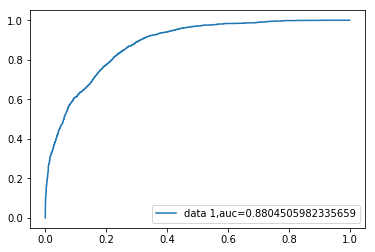

In [46]:
y_pred_proba = logreg.predict_proba(x_test)[::,1]
fpr,tpr,_ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test,y_pred_proba)
plt.plot(fpr,tpr,label="data 1,auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [47]:
#import pickle
#regressor = LogisticRegression()

In [48]:
#regressor.fit(x_train,y_train)

In [49]:
#pickle.dump(regressor, open('model.pkl','wb'))

In [50]:
#model = pickle.load(open('model.pkl','rb'))